In [1]:
import numpy as np
np.random.seed(123)

- 데이터 로딩

In [2]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(x_train)

8982

In [4]:
len(x_test)

2246

In [5]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
y_train[0]

3

- 단어 인덱싱 : 토큰 사전 만들기

In [7]:
word_idx = reuters.get_word_index()
idx2word = dict([(value, key) for (key, value) in word_idx.items()])
word2idx = dict([(key, value) for (key, value) in word_idx.items()])
idx2word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [8]:
decoded_news = ' '.join([idx2word.get(i-3, '.') for i in x_train[0]])
decoded_news

'. . . said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 원핫인코딩

In [9]:
def onehot(seq, dim=10000):
    results = np.zeros((len(seq), dim))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1
    return results

In [10]:
x_train = onehot(x_train)
x_test = onehot(x_test)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

- 목표변수(다중범주) 처리

In [12]:
from tensorflow.keras.utils import to_categorical

one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [13]:
one_hot_y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

- 모델 정의

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


- 컴파일

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

- Validation Set 준비

In [18]:
x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = one_hot_y_train[:1000]
p_y_train = one_hot_y_train[1000:]

In [19]:
len(p_x_train)

7982

- 모델학습

In [20]:
history = model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 3.3371 - acc: 0.3416 - val_loss: 1.9540 - val_acc: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.6813 - acc: 0.6745 - val_loss: 1.3719 - val_acc: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1662 - acc: 0.7618 - val_loss: 1.1484 - val_acc: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8958 - acc: 0.8218 - val_loss: 1.0409 - val_acc: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6961 - acc: 0.8642 - val_loss: 0.9617 - val_acc: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5471 - acc: 0.8904 - val_loss: 0.8976 - val_acc: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4471 - acc: 0.9101 - val_loss: 0.8724 - val_acc: 0.8180
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3574 - a

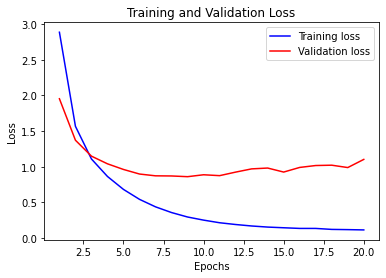

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) + 1)

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

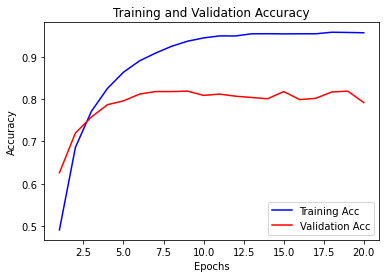

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'blue', label='Training Acc')
plt.plot(epochs, val_acc, 'red', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

- 과대적합을 줄이기 위해 Epoch을 줄이기

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(p_x_train, p_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_y_test)

Epoch 1/9
16/16 [==============================] - 1s 20ms/step - loss: 2.9679 - acc: 0.4195 - val_loss: 1.6643 - val_acc: 0.6350
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4667 - acc: 0.6870 - val_loss: 1.3122 - val_acc: 0.6990
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.1019 - acc: 0.7540 - val_loss: 1.1531 - val_acc: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8663 - acc: 0.8138 - val_loss: 1.0553 - val_acc: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6742 - acc: 0.8593 - val_loss: 0.9828 - val_acc: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5411 - acc: 0.8829 - val_loss: 0.9534 - val_acc: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4310 - acc: 0.9119 - val_loss: 0.9378 - val_acc: 0.8000
Epoch 8/9
16/16 [==============================] - 0s 11ms/step - loss: 0.3598 - acc: 0.92

In [24]:
results

[0.9996946454048157, 0.7787176966667175]

- 새로운 데이터에 대해 예측하기

In [25]:
pred = model.predict(x_test)
print(pred[0].shape)
print(np.sum(pred[0]))
print(np.argmax(pred[0]))

(46,)
1.0000001
3


- 출력층보다 작은 중간층을 사용하면 어떻게 될까?

In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_y_test)
results

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 3.7206 - acc: 0.0279 - val_loss: 3.4327 - val_acc: 0.0460
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 3.3228 - acc: 0.0619 - val_loss: 3.1604 - val_acc: 0.0850
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 3.0138 - acc: 0.1183 - val_loss: 2.8978 - val_acc: 0.1940
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 2.7121 - acc: 0.2281 - val_loss: 2.6092 - val_acc: 0.2640
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 2.3787 - acc: 0.2883 - val_loss: 2.3009 - val_acc: 0.2880
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 1.9982 - acc: 0.3927 - val_loss: 1.9807 - val_acc: 0.6260
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 1.6575 - acc: 0.6843 - val_loss: 1.7193 - val_acc: 0.6520
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4098 - a

[1.4335142374038696, 0.6936776638031006]